In [12]:
import pandas as pd


PATH = "test/distorted-images/distorted-images-data.csv"


df = pd.read_csv(PATH, sep=";", header=0)
df.drop(columns="INDEX", axis=1, inplace=True)
df.head()

,FILE_PATH,FILE_PASS,ORIG_0_CLASS,ORIG_0_CONFIDENCE,ORIG_1_CLASS,ORIG_1_CONFIDENCE,ORIG_2_CLASS,ORIG_2_CONFIDENCE,ORIG_3_CLASS,ORIG_3_CONFIDENCE,...,ZOOM_0_CLASS,ZOOM_0_CONFIDENCE,ZOOM_1_CLASS,ZOOM_1_CONFIDENCE,ZOOM_2_CLASS,ZOOM_2_CONFIDENCE,ZOOM_3_CLASS,ZOOM_3_CONFIDENCE,ZOOM_4_CLASS,ZOOM_4_CONFIDENCE
0,imagenette2/val/n01440764/ILSVRC2012_val_00009...,5,tench,99.645114,coho,0.152967,reel,0.071971,barracouta,0.067855,...,tench,89.735293,reel,7.349839,coho,1.589487,barracouta,1.256429,gar,0.022231
1,imagenette2/val/n01440764/ILSVRC2012_val_00009...,3,tench,99.645114,coho,0.152967,reel,0.071971,barracouta,0.067855,...,tench,89.735293,reel,7.349839,coho,1.589487,barracouta,1.256429,gar,0.022231
2,imagenette2/val/n01440764/ILSVRC2012_val_00009...,1,tench,99.645114,coho,0.152967,reel,0.071971,barracouta,0.067855,...,tench,89.735293,reel,7.349839,coho,1.589487,barracouta,1.256429,gar,0.022231
3,imagenette2/val/n01440764/ILSVRC2012_val_00009...,2,tench,99.645114,coho,0.152967,reel,0.071971,barracouta,0.067855,...,tench,89.735293,reel,7.349839,coho,1.589487,barracouta,1.256429,gar,0.022231
4,imagenette2/val/n01440764/ILSVRC2012_val_00009...,4,tench,99.645114,coho,0.152967,reel,0.071971,barracouta,0.067855,...,tench,89.735293,reel,7.349839,coho,1.589487,barracouta,1.256429,gar,0.022231


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FILE_PATH               6750 non-null   object 
 1   FILE_PASS               6750 non-null   int64  
 2   ORIG_0_CLASS            6750 non-null   object 
 3   ORIG_0_CONFIDENCE       6750 non-null   float64
 4   ORIG_1_CLASS            6750 non-null   object 
 5   ORIG_1_CONFIDENCE       6750 non-null   float64
 6   ORIG_2_CLASS            6750 non-null   object 
 7   ORIG_2_CONFIDENCE       6750 non-null   float64
 8   ORIG_3_CLASS            6750 non-null   object 
 9   ORIG_3_CONFIDENCE       6750 non-null   float64
 10  ORIG_4_CLASS            6750 non-null   object 
 11  ORIG_4_CONFIDENCE       6750 non-null   float64
 12  GAUSS_SSIM              6750 non-null   float64
 13  GAUSS_0_CLASS           6750 non-null   object 
 14  GAUSS_0_CONFIDENCE      6750 non-null   

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

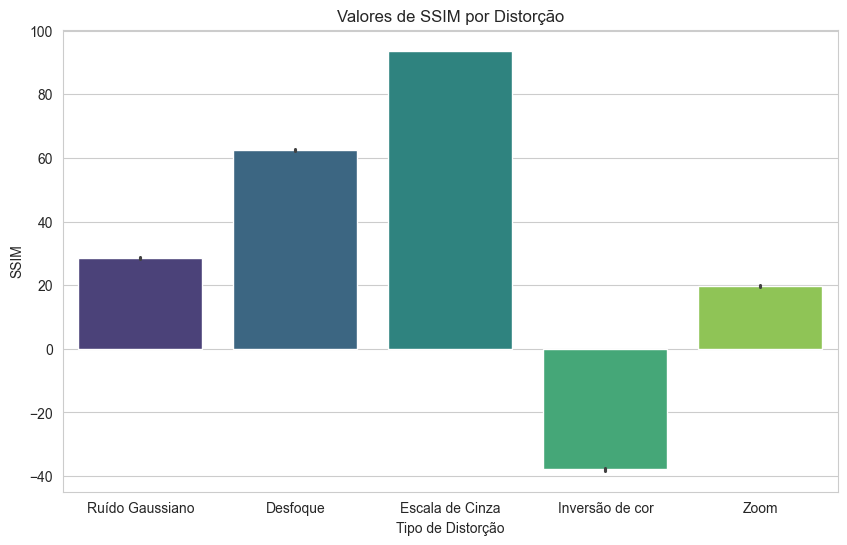

In [15]:
distortions = ["Ruído Gaussiano", "Desfoque", "Escala de Cinza", "Inversão de cor", "Zoom"]

ssim_df = df[["GAUSS_SSIM", "BLUR_SSIM", "GRAYSCALE_SSIM", "NEGATIVE_SSIM", "ZOOM_SSIM"]]
ssim_df.columns = distortions

ssim_long = ssim_df.melt(var_name='Distorção', value_name='SSIM')

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x='Distorção', y='SSIM', data=ssim_long, palette='viridis', hue="Distorção")
plt.title('Valores de SSIM por Distorção')
plt.ylabel('SSIM')
plt.xlabel('Tipo de Distorção')
plt.show()

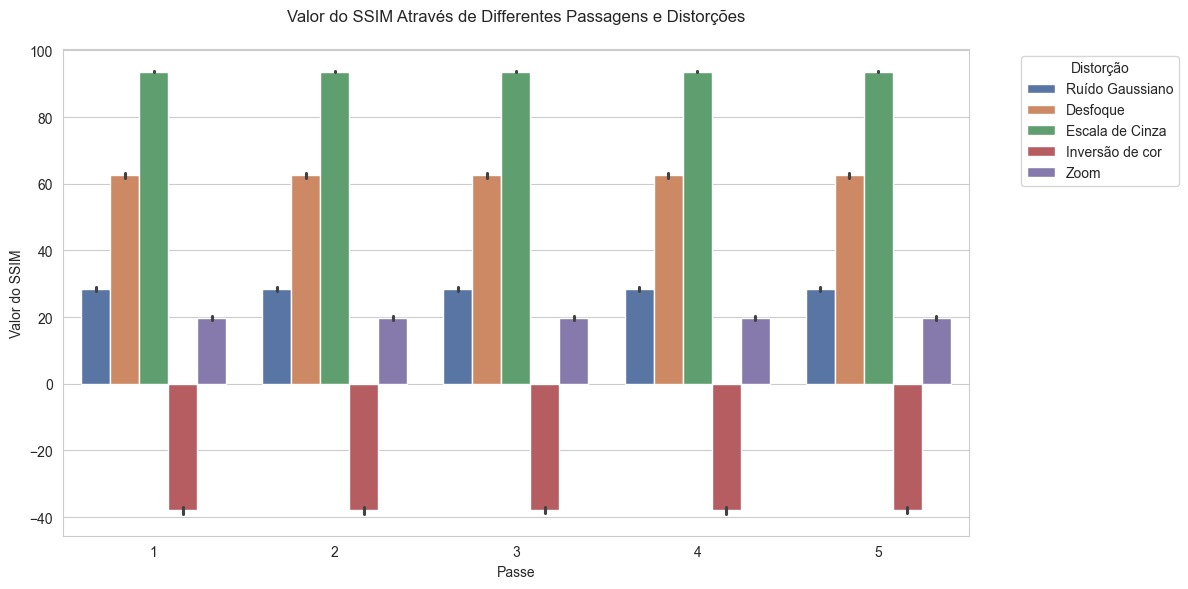

In [16]:
ssim_data = pd.DataFrame({
    'Passe': df['FILE_PASS'],
    'Ruído Gaussiano': df['GAUSS_SSIM'],
    'Desfoque': df['BLUR_SSIM'],
    'Escala de Cinza': df['GRAYSCALE_SSIM'],
    'Inversão de cor': df['NEGATIVE_SSIM'],
    'Zoom': df['ZOOM_SSIM']
})

melted_data = pd.melt(ssim_data, id_vars=['Passe'], var_name='Distortion Type', value_name='SSIM')

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(data=melted_data, x='Passe', y='SSIM', hue='Distortion Type', palette='deep')
plt.title('Valor do SSIM Através de Differentes Passagens e Distorções', pad=20)
plt.xlabel('Passe')
plt.ylabel('Valor do SSIM')
plt.legend(title='Distorção', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Quantidade de valores')

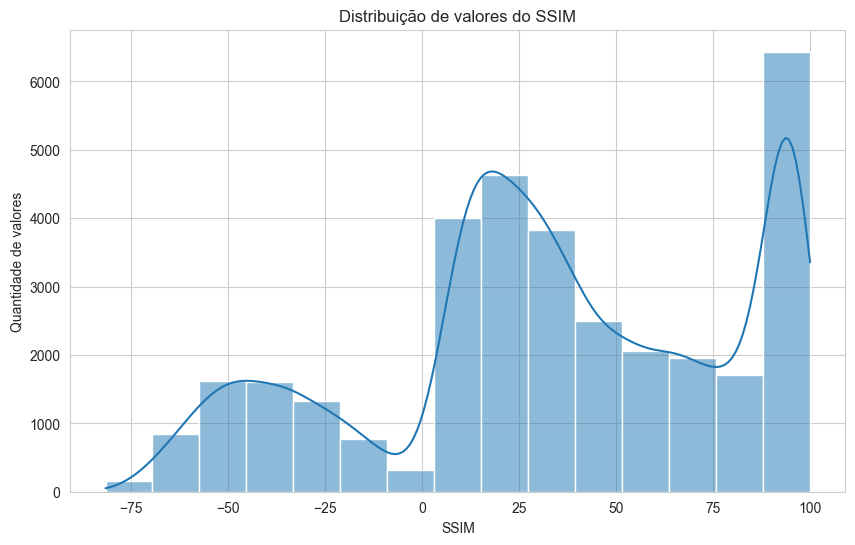

In [17]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.histplot(data=ssim_long["SSIM"], bins=15, kde=True)
plt.title(f"Distribuição de valores do SSIM")
plt.xlabel("SSIM")
plt.ylabel("Quantidade de valores")

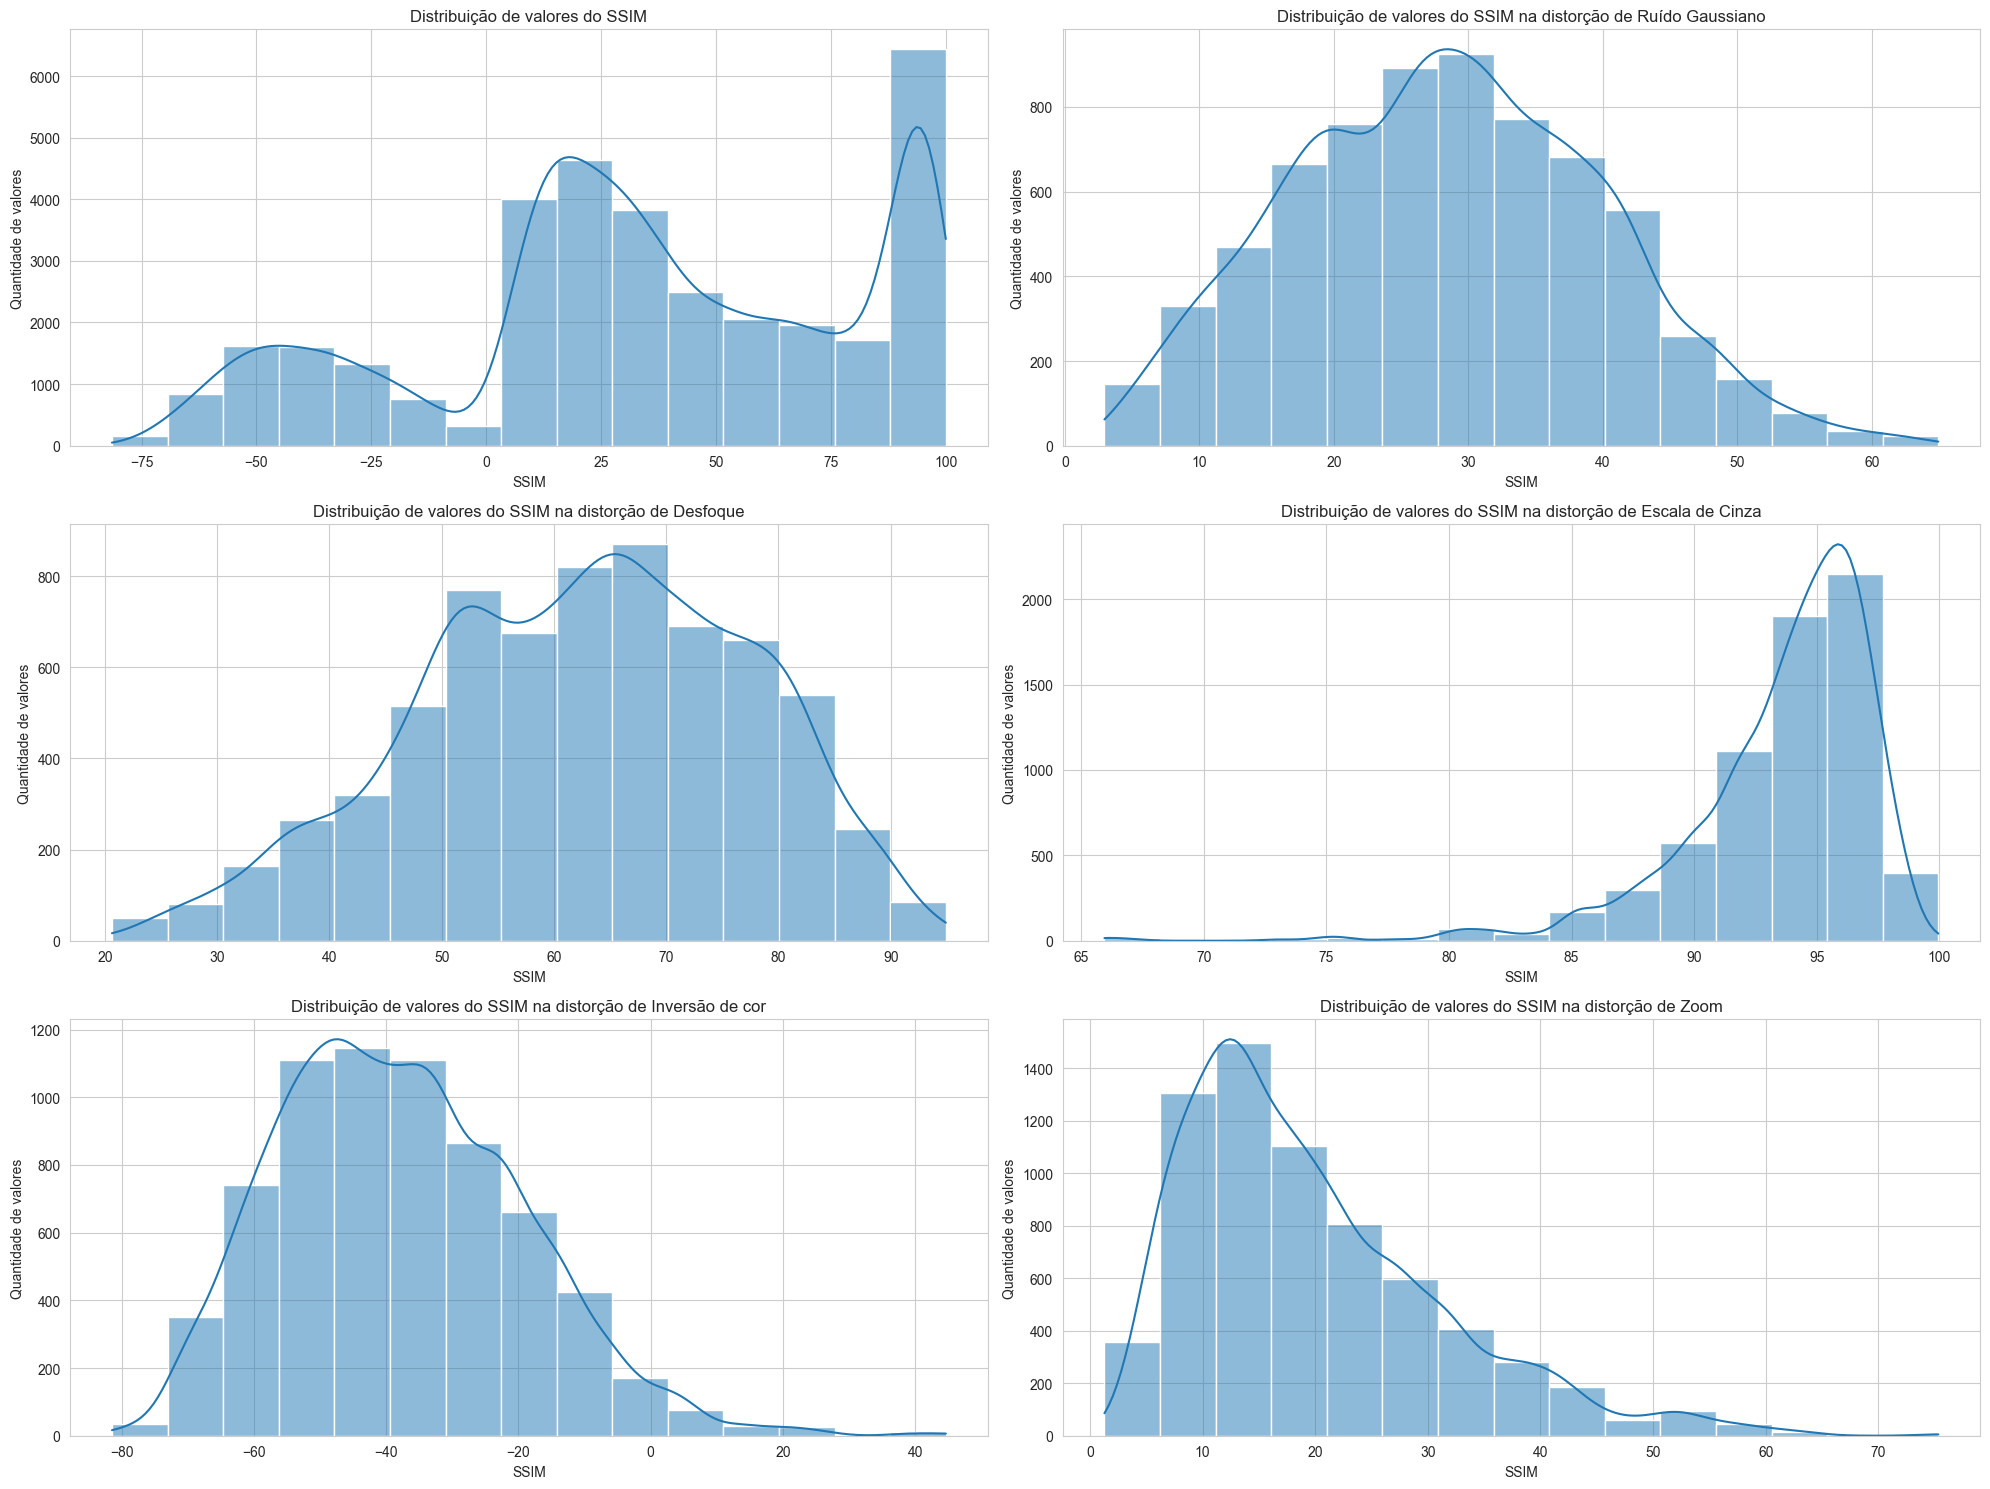

In [18]:
plt.figure(figsize=(20, 15))

plt.subplot(3, 2, 1)
sns.set_style("whitegrid")
sns.histplot(data=ssim_long["SSIM"], bins=15, kde=True)
plt.title(f"Distribuição de valores do SSIM")
plt.xlabel("SSIM")
plt.ylabel("Quantidade de valores")

plt.subplot(3, 2, 2)
sns.set_style("whitegrid")
sns.histplot(data=ssim_long["SSIM"].where(ssim_long["Distorção"] == distortions[0]), bins=15, kde=True)
plt.title(f"Distribuição de valores do SSIM na distorção de {distortions[0]}")
plt.xlabel("SSIM")
plt.ylabel("Quantidade de valores")

plt.subplot(3, 2, 3)
sns.set_style("whitegrid")
sns.histplot(data=ssim_long["SSIM"].where(ssim_long["Distorção"] == distortions[1]), bins=15, kde=True)
plt.title(f"Distribuição de valores do SSIM na distorção de {distortions[1]}")
plt.xlabel("SSIM")
plt.ylabel("Quantidade de valores")

plt.subplot(3, 2, 4)
sns.set_style("whitegrid")
sns.histplot(data=ssim_long["SSIM"].where(ssim_long["Distorção"] == distortions[2]), bins=15, kde=True)
plt.title(f"Distribuição de valores do SSIM na distorção de {distortions[2]}")
plt.xlabel("SSIM")
plt.ylabel("Quantidade de valores")

plt.subplot(3, 2, 5)
sns.set_style("whitegrid")
sns.histplot(data=ssim_long["SSIM"].where(ssim_long["Distorção"] == distortions[3]), bins=15, kde=True)
plt.title(f"Distribuição de valores do SSIM na distorção de {distortions[3]}")
plt.xlabel("SSIM")
plt.ylabel("Quantidade de valores")

plt.subplot(3, 2, 6)
sns.set_style("whitegrid")
sns.histplot(data=ssim_long["SSIM"].where(ssim_long["Distorção"] == distortions[4]), bins=15, kde=True)
plt.title(f"Distribuição de valores do SSIM na distorção de {distortions[4]}")
plt.xlabel("SSIM")
plt.ylabel("Quantidade de valores")

plt.tight_layout()
plt.show()

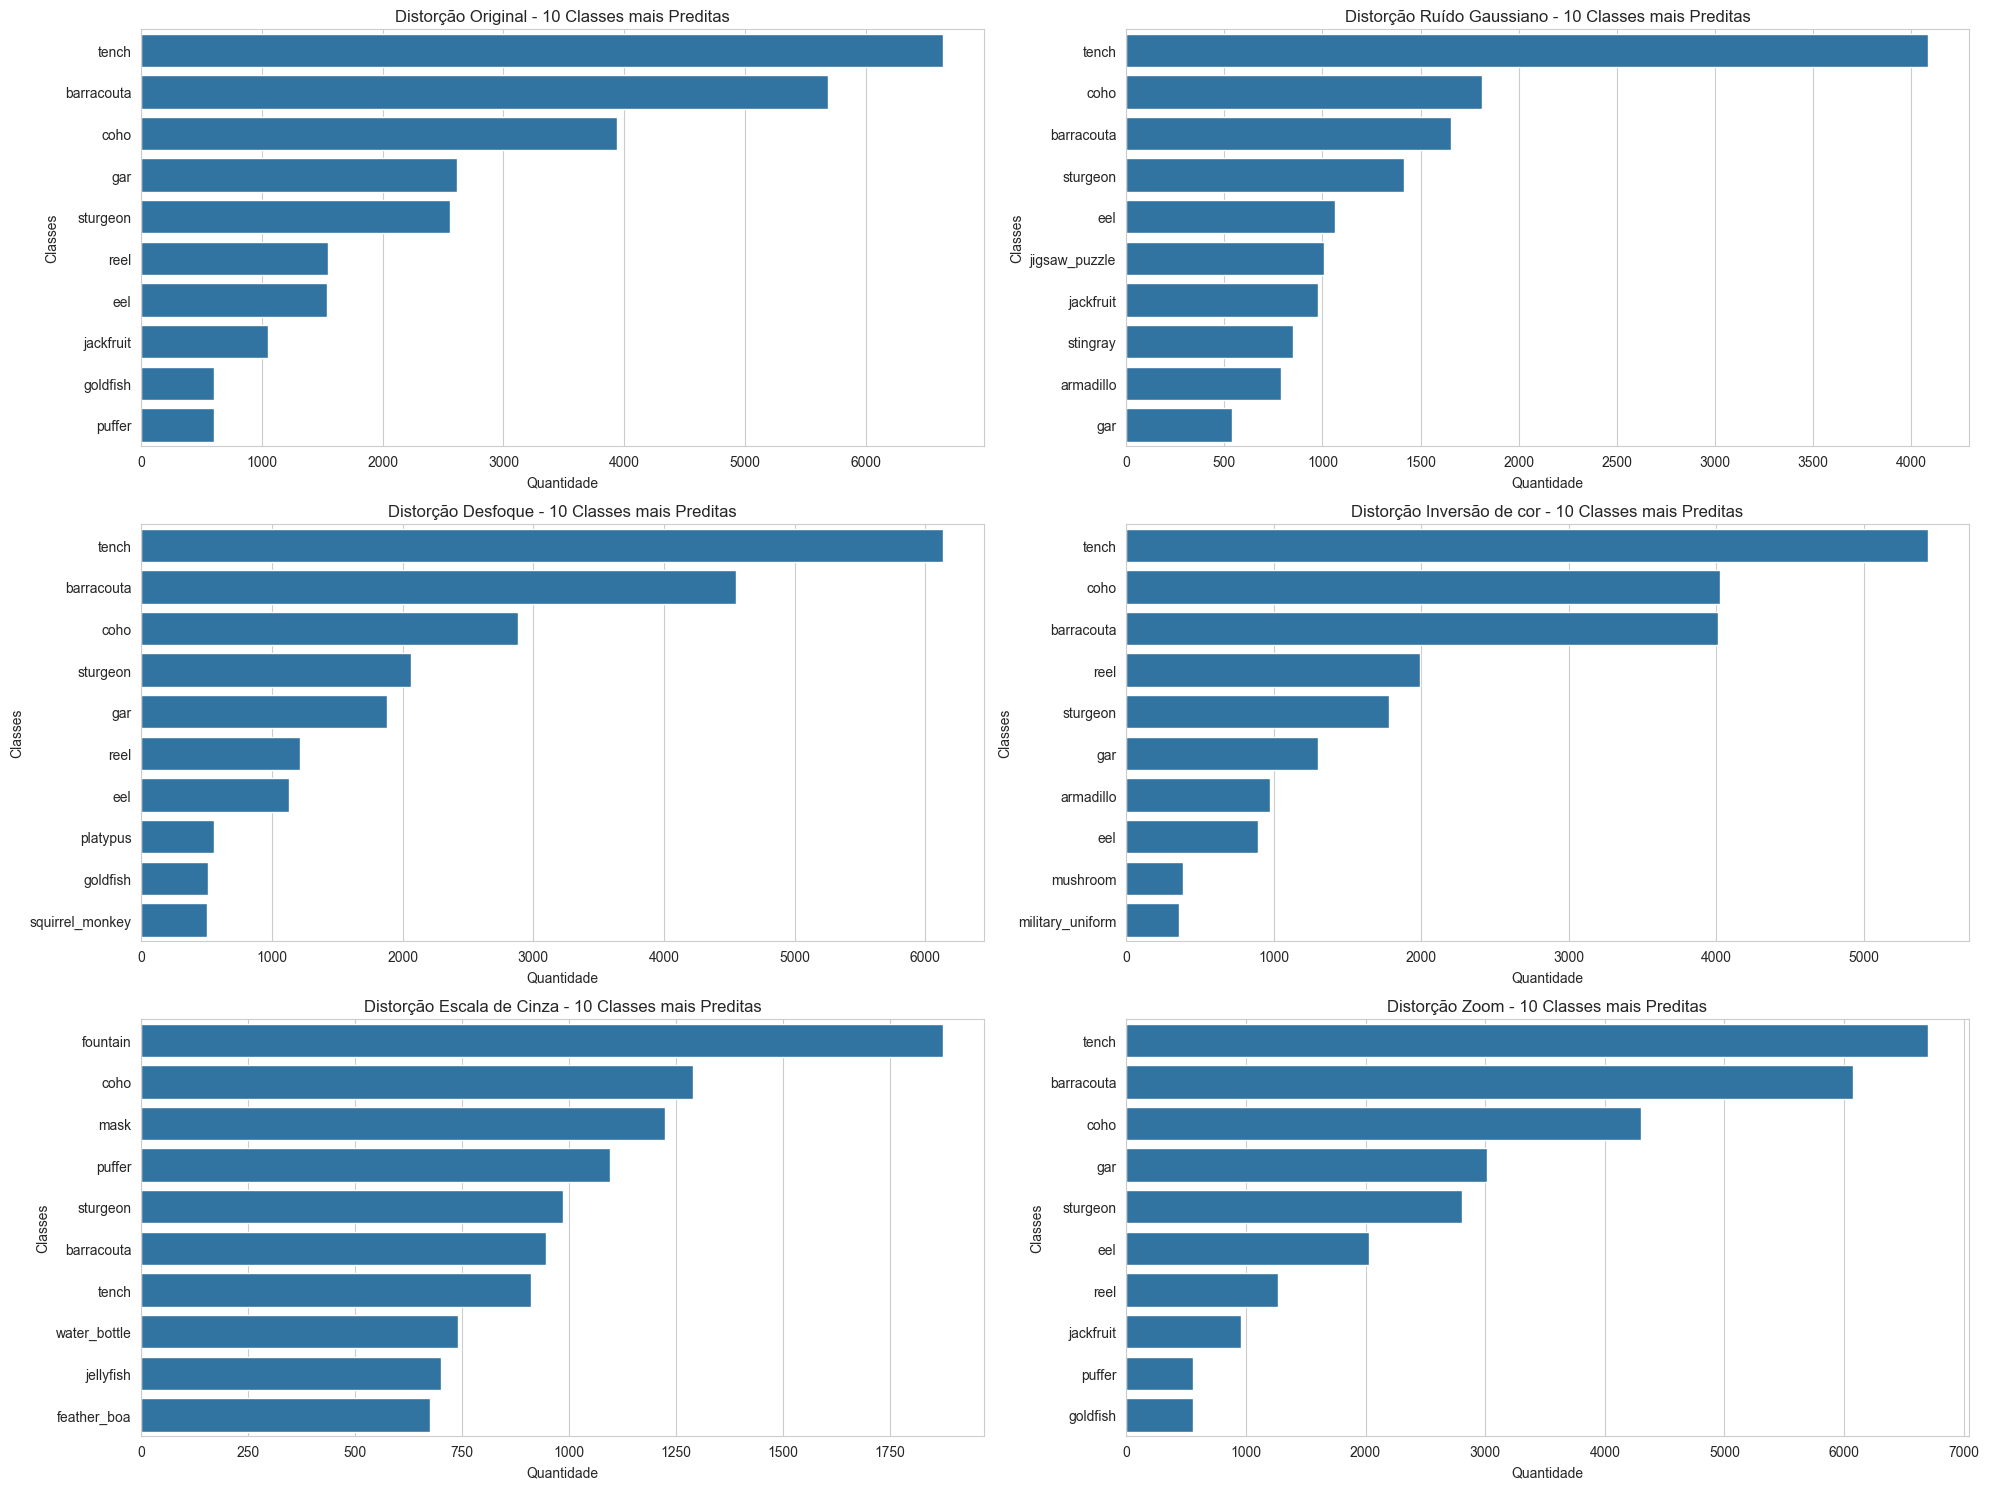

In [19]:
distortions = {
    "Original": ['ORIG_0_CLASS', 'ORIG_1_CLASS', 'ORIG_2_CLASS', 'ORIG_3_CLASS', 'ORIG_4_CLASS'],
    "Ruído Gaussiano": ['GAUSS_0_CLASS', 'GAUSS_1_CLASS', 'GAUSS_2_CLASS', 'GAUSS_3_CLASS', 'GAUSS_4_CLASS'],
    "Desfoque": ['BLUR_0_CLASS', 'BLUR_1_CLASS', 'BLUR_2_CLASS', 'BLUR_3_CLASS', 'BLUR_4_CLASS'],
    "Inversão de cor": ['GRAYSCALE_0_CLASS', 'GRAYSCALE_1_CLASS', 'GRAYSCALE_2_CLASS', 'GRAYSCALE_3_CLASS', 'GRAYSCALE_4_CLASS'],
    "Escala de Cinza": ['NEGARIVE_0_CLASS', 'NEGARIVE_1_CLASS', 'NEGARIVE_2_CLASS', 'NEGARIVE_3_CLASS', 'NEGARIVE_4_CLASS'],
    "Zoom": ['ZOOM_0_CLASS', 'ZOOM_1_CLASS', 'ZOOM_2_CLASS', 'ZOOM_3_CLASS', 'ZOOM_4_CLASS'],
}

plt.figure(figsize=(20, 15))

for idx, (distortion, columns) in enumerate(distortions.items(), 1):
    plt.subplot(3, 2, idx)

    classes = pd.Series([class_name for col in columns for class_name in df[col]])

    sns.countplot(
        data=classes.to_frame(name="class"),
        y="class",
        order=classes.value_counts().index[:10],
    )
    plt.title(f"Distorção {distortion} - 10 Classes mais Preditas")
    plt.xlabel("Quantidade")
    plt.ylabel("Classes")

plt.tight_layout()
plt.show()

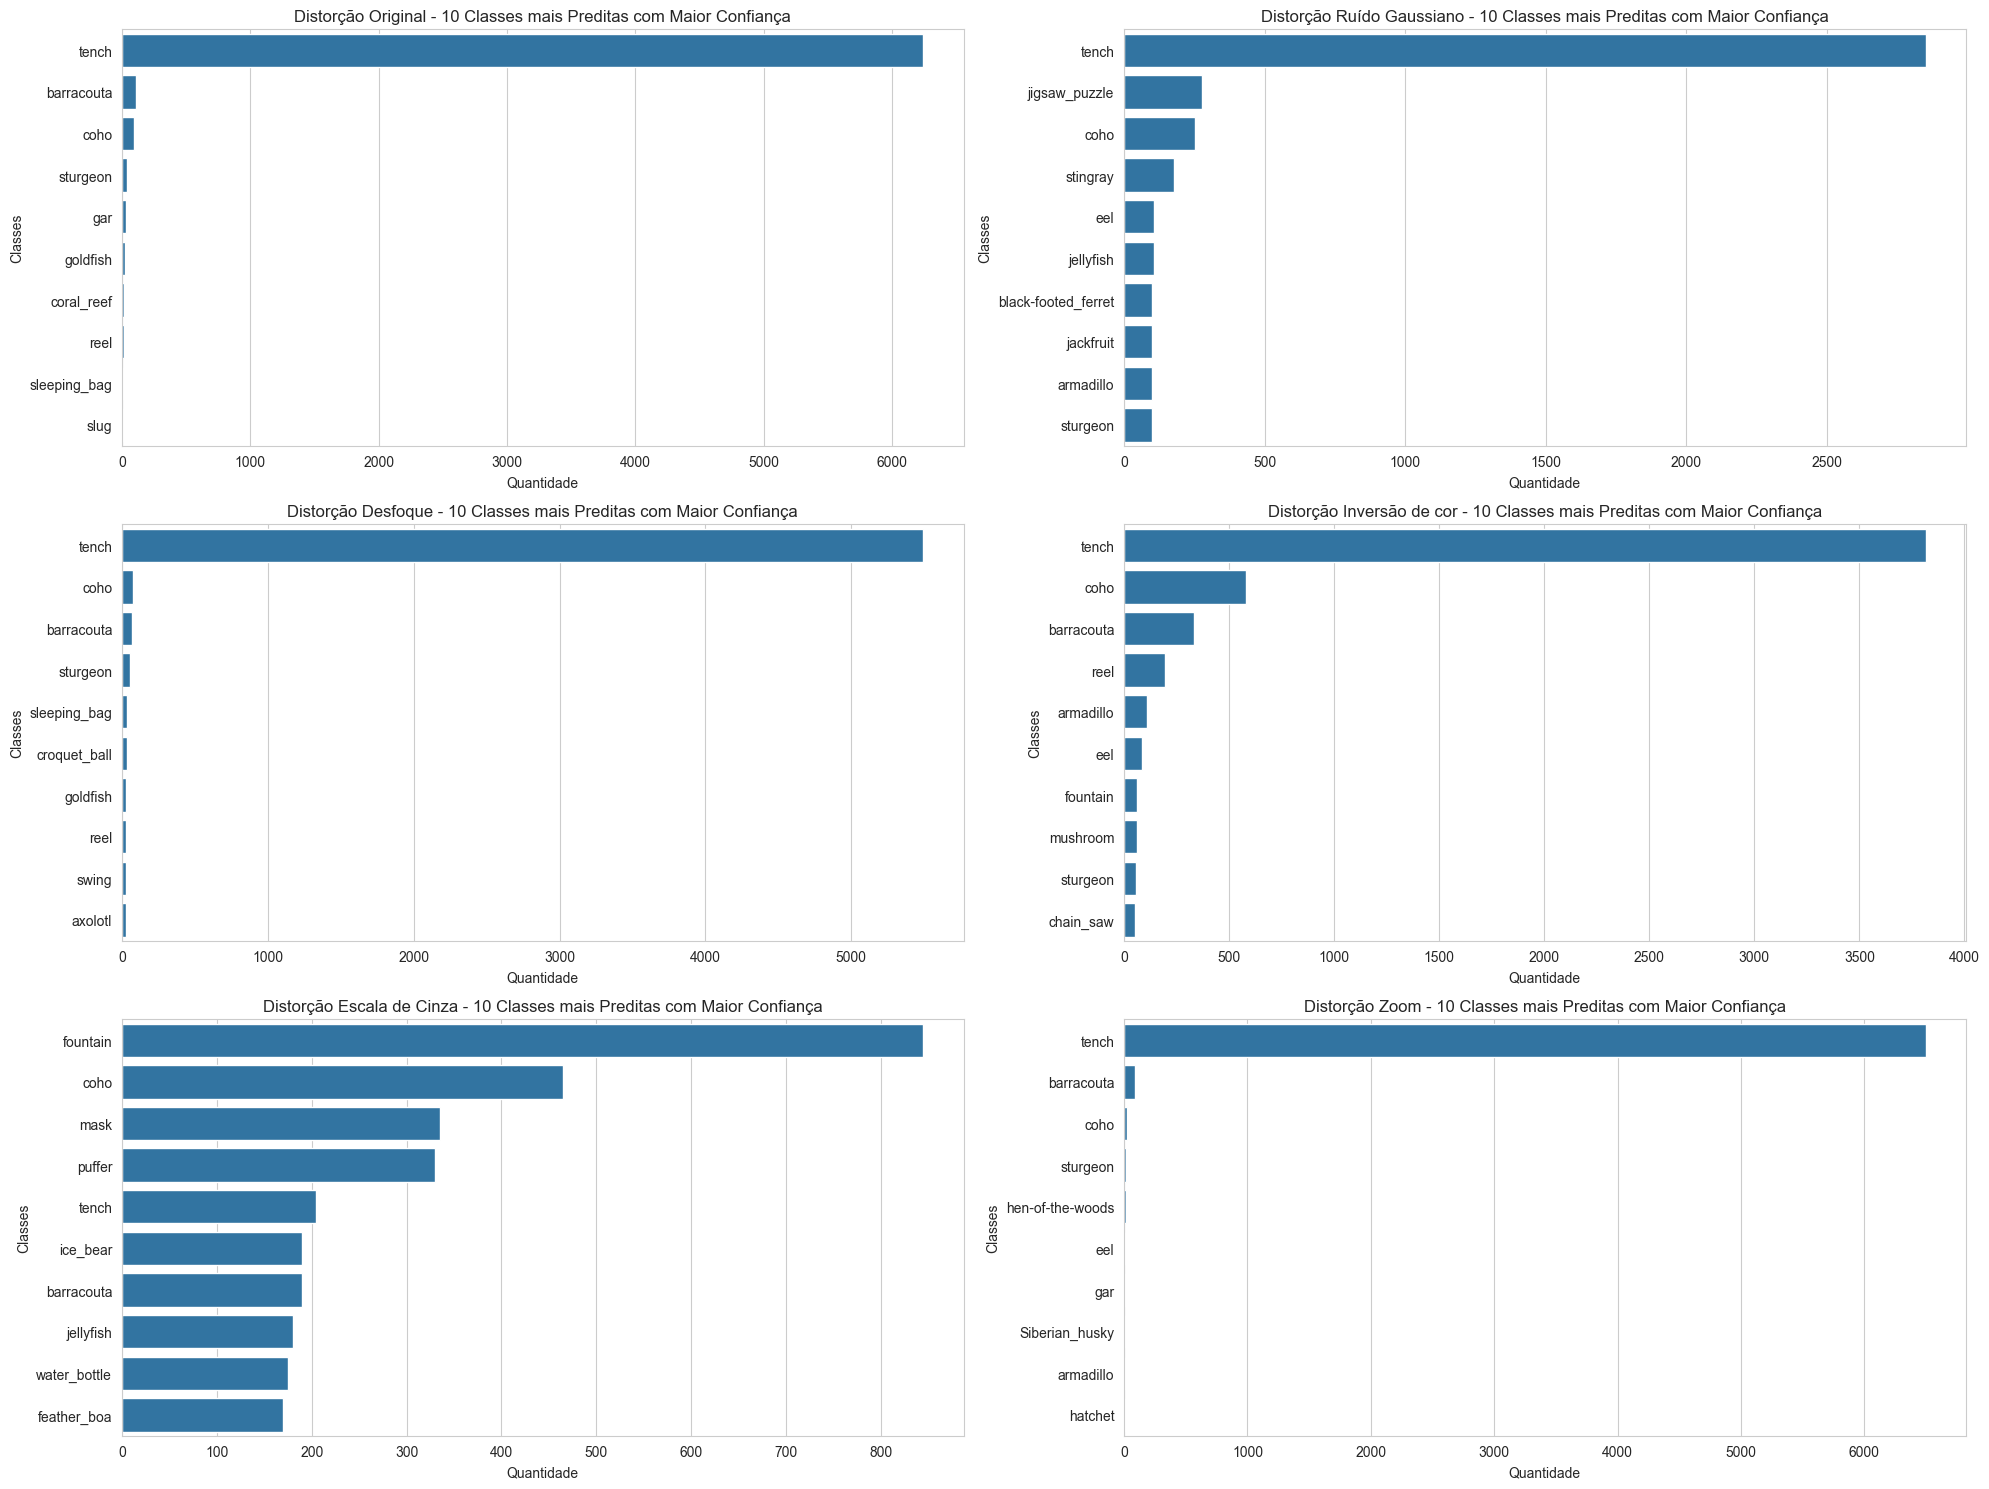

In [20]:
distortions = {
    "Original": ["ORIG_0_CLASS"],
    "Ruído Gaussiano": ["GAUSS_0_CLASS"],
    "Desfoque": ["BLUR_0_CLASS"],
    "Inversão de cor": ["GRAYSCALE_0_CLASS"],
    "Escala de Cinza": ["NEGARIVE_0_CLASS"],
    "Zoom": ["ZOOM_0_CLASS"],
}

plt.figure(figsize=(20, 15))

for idx, (distortion, columns) in enumerate(distortions.items(), 1):
    plt.subplot(3, 2, idx)

    classes = pd.Series([class_name for col in columns for class_name in df[col]])

    sns.countplot(
        data=classes.to_frame(name="class"),
        y="class",
        order=classes.value_counts().index[:10],
    )
    plt.title(f"Distorção {distortion} - 10 Classes mais Preditas com Maior Confiança")
    plt.xlabel("Quantidade")
    plt.ylabel("Classes")

plt.tight_layout()
plt.show()

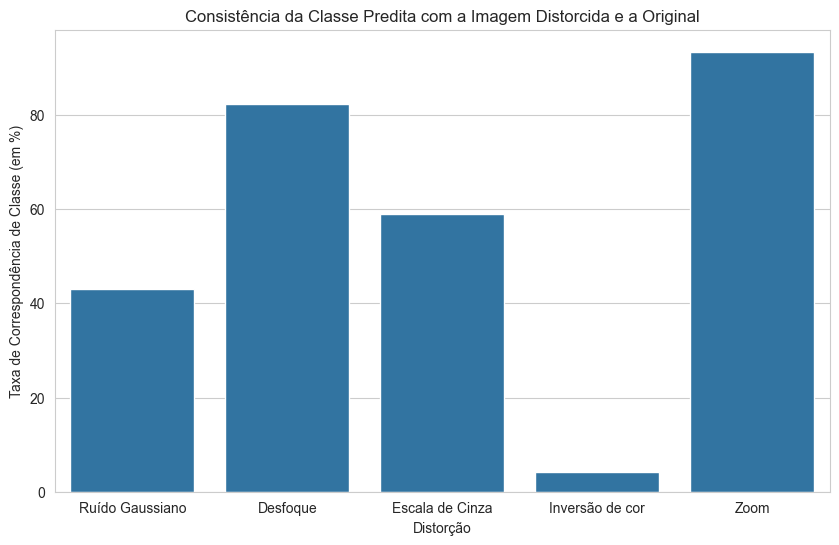

In [21]:
plt.figure(figsize=(10, 6))

def check_class_match(row, prefix):
    orig_class = row['ORIG_0_CLASS']
    distorted_class = row[f'{prefix}_0_CLASS']
    return orig_class == distorted_class

class_consistency = pd.DataFrame({
    'Distorção': ["Ruído Gaussiano", "Desfoque", "Escala de Cinza", "Inversão de cor", "Zoom"],
    'Taxa de Correspondência de Classe (em %)': [
        100 * sum(df.apply(lambda x: check_class_match(x, 'GAUSS'), axis=1)) / len(df),
        100 * sum(df.apply(lambda x: check_class_match(x, 'BLUR'), axis=1)) / len(df),
        100 * sum(df.apply(lambda x: check_class_match(x, 'GRAYSCALE'), axis=1)) / len(df),
        100 * sum(df.apply(lambda x: check_class_match(x, 'NEGARIVE'), axis=1)) / len(df),
        100 * sum(df.apply(lambda x: check_class_match(x, 'ZOOM'), axis=1)) / len(df)
    ]
})

sns.set_style("whitegrid")
sns.barplot(data=class_consistency, x='Distorção', y='Taxa de Correspondência de Classe (em %)')
plt.title('Consistência da Classe Predita com a Imagem Distorcida e a Original')
plt.show()